In [1]:
from tools import data_preparation as dp
from tools import connections
import requests

import pandas as pd
import numpy as np
import requests
import datetime
import os
import sys

In [2]:
import os
print(os.getcwd())

C:\Users\kocin\Desktop\crypto\supplier\notebooks


In [3]:
con = connections.connect_postgres()

In [72]:
q = 'select * from coingecko_listed_projects'

In [73]:
df = pd.read_sql_query(q, con).reset_index(drop=True)

C:\Programowanie\Anaconda\lib\site-packages\pandas\io\sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [74]:
df.head()

,symbol,api_id,gem,narratives,description,banned,added
0,AIT,ai-trader,False,None,None,False,2023-03-29 12:23:43
1,CHR,chronos-finance,False,None,None,False,2023-03-29 12:23:43
2,CRA,cracle,False,None,None,False,2023-03-29 12:23:43
3,1DOGE,1doge,False,banned(dog),banned(dog),True,2023-02-20 21:07:33
4,FND,rare-fnd,False,banned(can_mint_new_tokens),banned(can_mint_new_tokens),True,2023-02-20 21:07:40


In [75]:
df.head(10)

,symbol,api_id,gem,narratives,description,banned,added
0,AIT,ai-trader,False,None,None,False,2023-03-29 12:23:43
1,CHR,chronos-finance,False,None,None,False,2023-03-29 12:23:43
2,CRA,cracle,False,None,None,False,2023-03-29 12:23:43
3,1DOGE,1doge,False,banned(dog),banned(dog),True,2023-02-20 21:07:33
4,FND,rare-fnd,False,banned(can_mint_new_tokens),banned(can_mint_new_tokens),True,2023-02-20 21:07:40
5,1RT,1reward-token,False,banned(reward),banned(reward),True,2023-02-20 21:07:33
6,1SOL,1sol-io-wormhole,False,banned(wormhole),banned(wormhole),True,2023-02-20 21:07:33
7,0XW,0xwallet-token,False,banned(variable_tax),banned(variable_tax),True,2023-02-20 21:07:33
8,2044,2044-nuclear-apocalypse,False,banned(variable_tax),banned(variable_tax),True,2023-02-20 21:07:33
9,REALT-S-12405-SANTA-ROSA-DR-DETROIT-MI,12405-santa-rosa,False,banned,banned,True,2023-02-20 21:07:33


In [76]:
new2 = df[['symbol', 'api_id', 'banned', 'description']]

In [77]:
new2.head()

,symbol,api_id,banned,description
0,AIT,ai-trader,False,None
1,CHR,chronos-finance,False,None
2,CRA,cracle,False,None
3,1DOGE,1doge,True,banned(dog)
4,FND,rare-fnd,True,banned(can_mint_new_tokens)


In [78]:
new2['dex'] = ''
new2['dot'] = ''
new2['ibc'] = ''
new2['lend'] = ''
new2['lsd'] = ''
new2['l1'] = ''
new2['l2'] = ''
new2['nft'] = ''
new2['perps'] = ''
new2['pow'] = ''
new2['privacy'] = ''
new2['stables'] = ''
new2['yield'] = ''
new2['zk'] = ''
new2['rank'] = 0

C:\Users\kocin\AppData\Local\Temp/ipykernel_11836/2384203930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new2['dex'] = ''
C:\Users\kocin\AppData\Local\Temp/ipykernel_11836/2384203930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new2['dot'] = ''


In [79]:
new2.dtypes

symbol         object
api_id         object
banned           bool
description    object
dex            object
dot            object
ibc            object
lend           object
lsd            object
l1             object
l2             object
nft            object
perps          object
pow            object
privacy        object
stables        object
yield          object
zk             object
rank            int64
dtype: object

In [80]:
new2['l1'] = new2['l1'].astype('bool')
new2['l2'] = new2['l2'].astype('bool')
new2['zk'] = new2['zk'].astype('bool')
new2['dot'] = new2['dot'].astype('bool')
new2['ibc'] = new2['ibc'].astype('bool')
new2['dex'] = new2['dex'].astype('bool')
new2['lend'] = new2['lend'].astype('bool')
new2['lsd'] = new2['lsd'].astype('bool')
new2['perps'] = new2['perps'].astype('bool')
new2['stables'] = new2['stables'].astype('bool')
new2['yield'] = new2['yield'].astype('bool')
new2['nft'] = new2['nft'].astype('bool')
new2['pow'] = new2['pow'].astype('bool')
new2['privacy'] = new2['privacy'].astype('bool')
new2['banned'] = new2['banned'].astype('bool')

In [81]:
new2['rank'] = new2['rank'].astype('int64')

In [82]:
new2.head()

,symbol,api_id,banned,description,dex,dot,ibc,...,perps,pow,privacy,stables,yield,zk,rank
0,AIT,ai-trader,False,None,False,False,False,...,False,False,False,False,False,False,0
1,CHR,chronos-finance,False,None,False,False,False,...,False,False,False,False,False,False,0
2,CRA,cracle,False,None,False,False,False,...,False,False,False,False,False,False,0
3,1DOGE,1doge,True,banned(dog),False,False,False,...,False,False,False,False,False,False,0
4,FND,rare-fnd,True,banned(can_mint_new_tokens),False,False,False,...,False,False,False,False,False,False,0


In [67]:
new2.head()

,symbol,api_id,description,dex,dot,ibc,lend,...,perps,pow,privacy,stables,yield,zk,rank
0,AIT,ai-trader,None,False,False,False,False,...,False,False,False,False,False,False,0
1,CHR,chronos-finance,None,False,False,False,False,...,False,False,False,False,False,False,0
2,CRA,cracle,None,False,False,False,False,...,False,False,False,False,False,False,0
3,1DOGE,1doge,banned(dog),False,False,False,False,...,False,False,False,False,False,False,0
4,FND,rare-fnd,banned(can_mint_new_tokens),False,False,False,False,...,False,False,False,False,False,False,0


In [83]:
new3 = new2[['symbol', 'api_id', 'rank', 'dex', 'dot', 'ibc', 'lend', 'lsd', 'l1', 'l2', 'nft', 'perps', 'pow', 'privacy', 'stables', 'yield', 'zk', 'banned', 'description']].reset_index(drop=True)

In [84]:
new3.head()

,symbol,api_id,rank,dex,dot,ibc,lend,...,pow,privacy,stables,yield,zk,banned,description
0,AIT,ai-trader,0,False,False,False,False,...,False,False,False,False,False,False,None
1,CHR,chronos-finance,0,False,False,False,False,...,False,False,False,False,False,False,None
2,CRA,cracle,0,False,False,False,False,...,False,False,False,False,False,False,None
3,1DOGE,1doge,0,False,False,False,False,...,False,False,False,False,False,True,banned(dog)
4,FND,rare-fnd,0,False,False,False,False,...,False,False,False,False,False,True,banned(can_mint_new_tokens)


In [85]:
from postgres import modifications

In [86]:
modifications.save_dataframe_in_postgres(new3, 'coingecko', 'replace')

In [6]:
con = connections.connect_postgres()

In [12]:
q = "SELECT * FROM cg_slugs where blacklisted is false and checked is false and coin ~* '^[C]' order by coin"

In [13]:
df = pd.read_sql_query(q, con).reset_index(drop=True)

In [14]:
df.head()

,coin,name,slug,blacklisted,gem,checked,description,date
0,CLH,ClearDAO,cleardao,False,False,False,ethereum-defi-derivatives,2022-04-11 19:34:29
1,CLOAK,Cloakcoin,cloakcoin,False,False,False,default,2022-04-11 19:34:29
2,CLUNA,Prism cLUNA,prism-cluna,False,False,False,default,2022-04-11 19:34:29
3,CM,Cromarket Token,cromarket-token,False,False,False,default,2022-04-22 13:51:28
4,CMD,Comodo Coin,comodo-coin,False,False,False,default,2022-04-25 19:54:18


In [10]:
import mplfinance as mpl

In [11]:
#client = mt5.initialize()

In [12]:
#client

In [13]:
mt5

<module 'MetaTrader5' from 'C:\\Programowanie\\Anaconda\\lib\\site-packages\\MetaTrader5\\__init__.py'>

In [14]:
if not mt5.initialize():
    print("initialize() failed")
    mt5.shutdown()

In [15]:
print(mt5.terminal_info())

TerminalInfo(community_account=False, community_connection=False, connected=True, dlls_allowed=False, trade_allowed=False, tradeapi_disabled=False, email_enabled=False, ftp_enabled=False, notifications_enabled=False, mqid=False, build=3283, maxbars=100000, codepage=1250, ping_last=59675, community_balance=0.0, retransmission=0.0, company='MetaQuotes Software Corp.', name='MetaTrader 5', language='Polish', path='C:\\Program Files\\MetaTrader 5', data_path='C:\\Users\\kocin\\AppData\\Roaming\\MetaQuotes\\Terminal\\D0E8209F77C8CF37AD8BF550E51FF075', commondata_path='C:\\Users\\kocin\\AppData\\Roaming\\MetaQuotes\\Terminal\\Common')


In [40]:
us500_candles = mt5.copy_rates_from("US500", mt5.TIMEFRAME_M5, datetime.datetime.now(), 5)

In [41]:
df = pd.DataFrame(us500_candles)

In [42]:
df['date'] = [datetime.datetime.fromtimestamp(i) for i in df.time]

In [43]:
df

,time,open,high,low,close,tick_volume,spread,real_volume,date
0,1651845300,4068.9,4074.1,4061.6,4068.1,844,7,0,2022-05-06 15:55:00
1,1651845600,4067.8,4076.8,4061.6,4073.1,805,7,0,2022-05-06 16:00:00
2,1651845900,4073.8,4091.8,4073.1,4074.8,835,7,0,2022-05-06 16:05:00
3,1651846200,4075.1,4091.3,4068.8,4085.1,853,7,0,2022-05-06 16:10:00
4,1651846500,4085.1,4097.1,4084.4,4096.8,447,7,0,2022-05-06 16:15:00


In [44]:
df.index = df.date

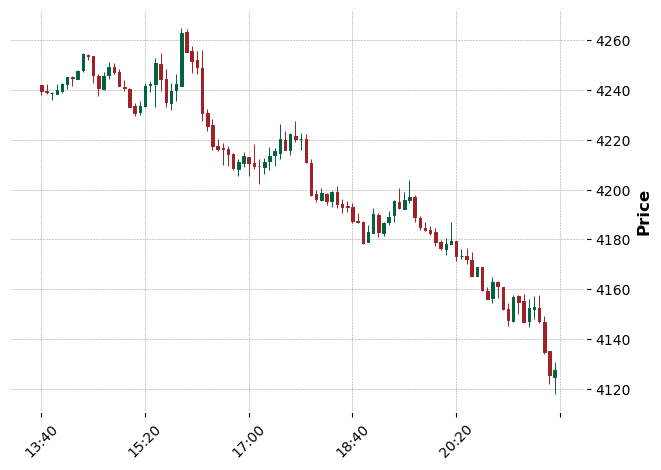

In [14]:
mpl.plot(df, volume=False, type='candle', style='charles')

In [ ]:
client = connections.connect_binance_futures_api()

In [ ]:
d = client.depth(symbol='QNTUSDT', limit=500)

In [ ]:
df_list = []
for side in ["bids", "asks"]:
    df = pd.DataFrame(d[side], columns=["price", "quantity"], dtype=float)
    df["side"] = side
    df_list.append(df)
df = pd.concat(df_list).reset_index(drop=True)

In [91]:
df['usd_depth'] = df.price*df.quantity

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
def get_ymax(df):
    sum_bid = df[df.side == 'bids'].usd_depth.sum()
    sum_ask = df[df.side == 'asks'].usd_depth.sum()
    if sum_ask > sum_bid:
        return int(round(sum_ask))
    else:
        return int(round(sum_bid))

In [111]:
get_ymax(df)

1693680

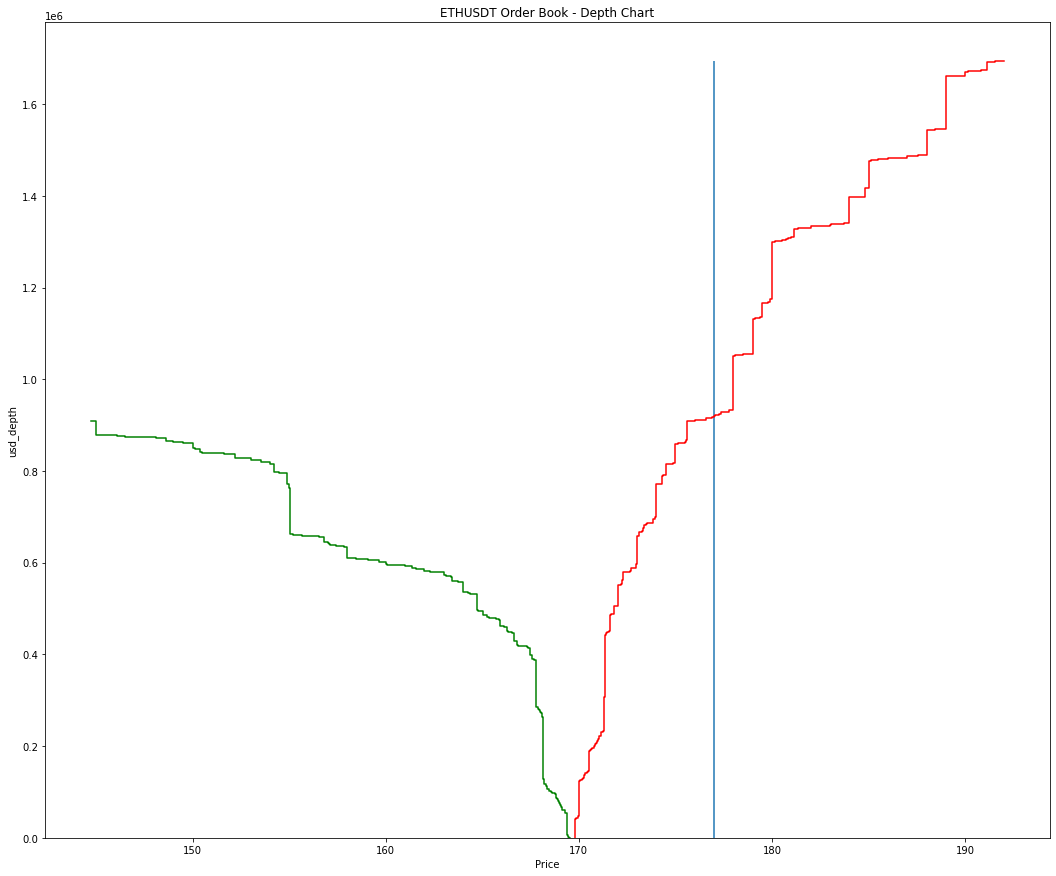

In [113]:
fig, ax = plt.subplots(figsize=[18, 15])
ax.set_title(f"ETHUSDT Order Book - Depth Chart")
sns.ecdfplot(x="price", weights="usd_depth", stat="count", 
             complementary=True, data=df.query("side == 'bids'"), 
             color="green", ax=ax)
sns.ecdfplot(x="price", weights="usd_depth", stat="count", 
             data=df.query("side == 'asks'"), color="red", 
             ax=ax)
ax.set_xlabel("Price")
ax.set_ylabel("usd_depth")
plt.vlines(177, ymin=0, ymax=get_ymax(df))

In [3]:
client = connections.connect_binance_futures_api()

In [5]:
d = client.open_interest_hist('BTCUSDT', '5m')

In [8]:
d[len(d) - 1]

{'symbol': 'BTCUSDT',
 'sumOpenInterest': '99503.97300000',
 'sumOpenInterestValue': '1662567379.59459640',
 'timestamp': 1671266400000}

In [3]:
from tools import enums

In [4]:
for items in enums.get_twitter_accounts_to_check():
    print(f'https://www.twitter.com/{items}')

https://www.twitter.com/ElCryptoDoc
https://www.twitter.com/CryptoKaduna
https://www.twitter.com/layer3xyz
https://www.twitter.com/Derivatives_Ape
https://www.twitter.com/TheDeFISaint
https://www.twitter.com/MariusCrypt0
https://www.twitter.com/Dr_Carborane_
https://www.twitter.com/bloomstarbms
https://www.twitter.com/Abrahamchase09
https://www.twitter.com/0xDegenz
https://www.twitter.com/Cosmos_Airdrops
https://www.twitter.com/its_airdrop
https://www.twitter.com/NDIDI_GRAM
https://www.twitter.com/MingoAirdrop
https://www.twitter.com/cmtopdog
https://www.twitter.com/BitcoinSLO
https://www.twitter.com/thedefiedge
https://www.twitter.com/alpinestar17
https://www.twitter.com/TharsisHQ
https://www.twitter.com/tapioca_dao
https://www.twitter.com/0xAdesola
https://www.twitter.com/milesdeutscher
https://www.twitter.com/LouisCooper_
https://www.twitter.com/BarryFried1
https://www.twitter.com/CrossChainAlex
https://www.twitter.com/cryptocrossOver
https://www.twitter.com/cryptoskullx
https://www

In [3]:
c = connections.connect_binance_futures_api()

In [7]:
import pandas as pd
import numpy as np
from scipy import stats, signal
import plotly.express as px
import plotly.graph_objects as go

In [31]:
candles = dp.get_binance_futures_candlesticks(c, 'BTCUSDT', '30m', 1000)
df = dp.prepare_df_with_binance_futures_candlesticks(candles)
volume = df['volume']
close = df['close']

2023-01-12 17:22:38. BINANCEFUT: BTCUSDT - 30m candle - download finished.


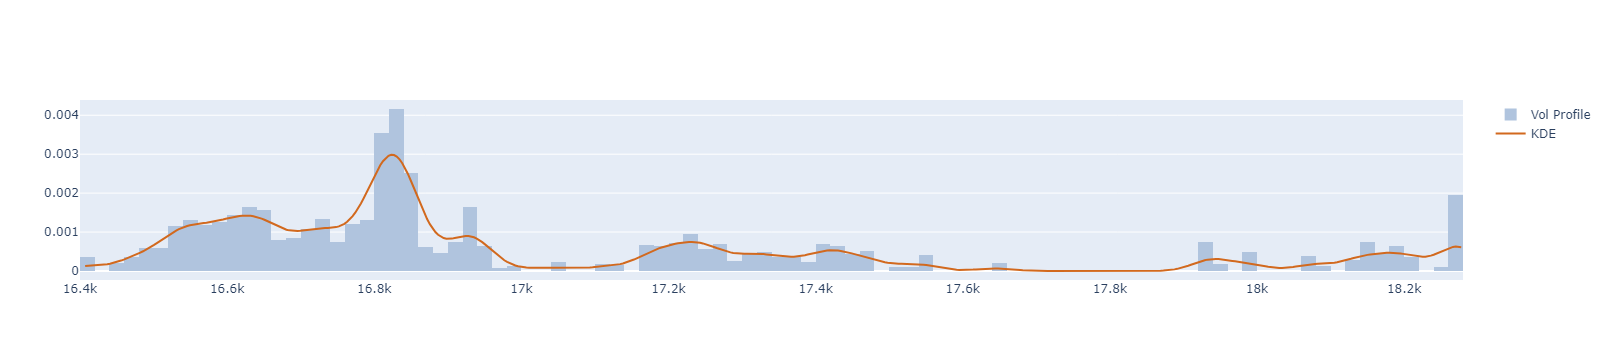

In [32]:
kde_factor = 0.05
num_samples = 500
kde = stats.gaussian_kde(close,weights=volume,bw_method=kde_factor)
xr = np.linspace(close.min(),close.max(),num_samples)
kdy = kde(xr)
ticks_per_sample = (xr.max() - xr.min()) / num_samples

def get_dist_plot(c, v, kx, ky):
    fig = go.Figure()
    fig.add_trace(go.Histogram(name='Vol Profile', x=c, y=v, nbinsx=150, 
                               histfunc='sum', histnorm='probability density',
                               marker_color='#B0C4DE'))
    fig.add_trace(go.Scatter(name='KDE', x=kx, y=ky, mode='lines', marker_color='#D2691E'))
    return fig

get_dist_plot(close, volume, xr, kdy).show()

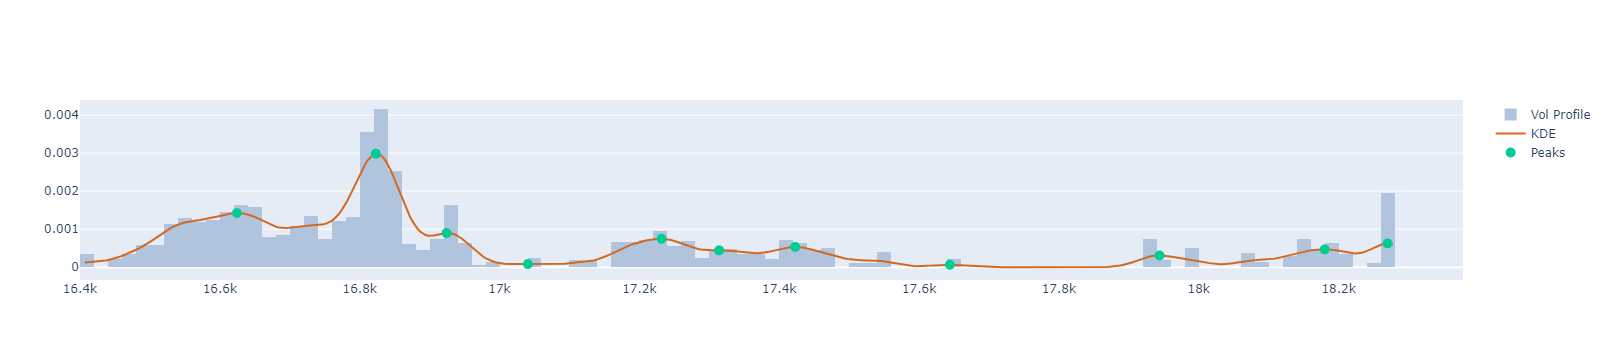

In [33]:
peaks,_ = signal.find_peaks(kdy)
pkx = xr[peaks]
pky = kdy[peaks]

pk_marker_args=dict(size=10)
fig = get_dist_plot(close, volume, xr, kdy)
fig.add_trace(go.Scatter(name="Peaks", x=pkx, y=pky, mode='markers', marker=pk_marker_args))

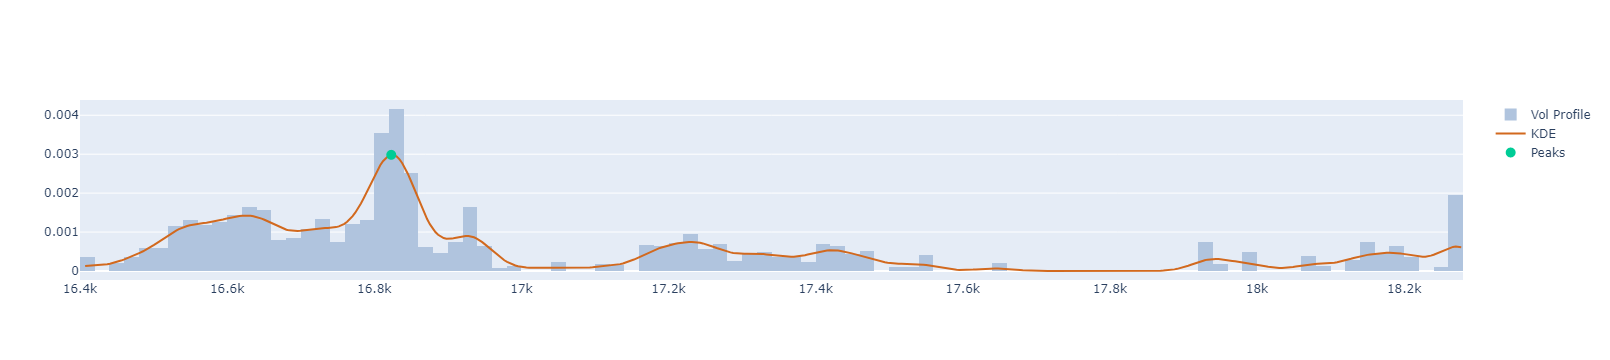

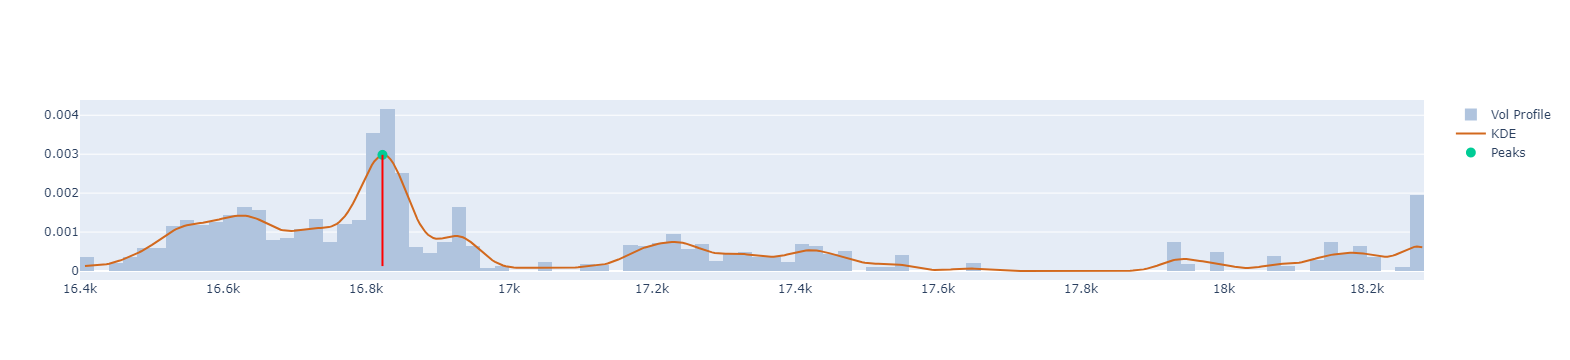

In [36]:
min_prom = kdy.max() * 0.25
peaks, peak_props = signal.find_peaks(kdy, prominence=min_prom)
pkx = xr[peaks]
pky = kdy[peaks]


fig = get_dist_plot(close, volume, xr, kdy)
fig.add_trace(go.Scatter(name='Peaks', x=pkx, y=pky, mode='markers', marker=pk_marker_args))
fig.show()

# Draw prominence lines
#left_base = peak_props['left_bases']
#right_base = peak_props['right_bases']
line_x = pkx
line_y0 = pky
line_y1 = pky - peak_props['prominences']

for x, y0, y1 in zip(line_x, line_y0, line_y1):
    fig.add_shape(type='line',
        xref='x', yref='y',
        x0=x, y0=y0, x1=x, y1=y1,
        line=dict(
            color='red',
            width=2,
        )
    )
fig.show()

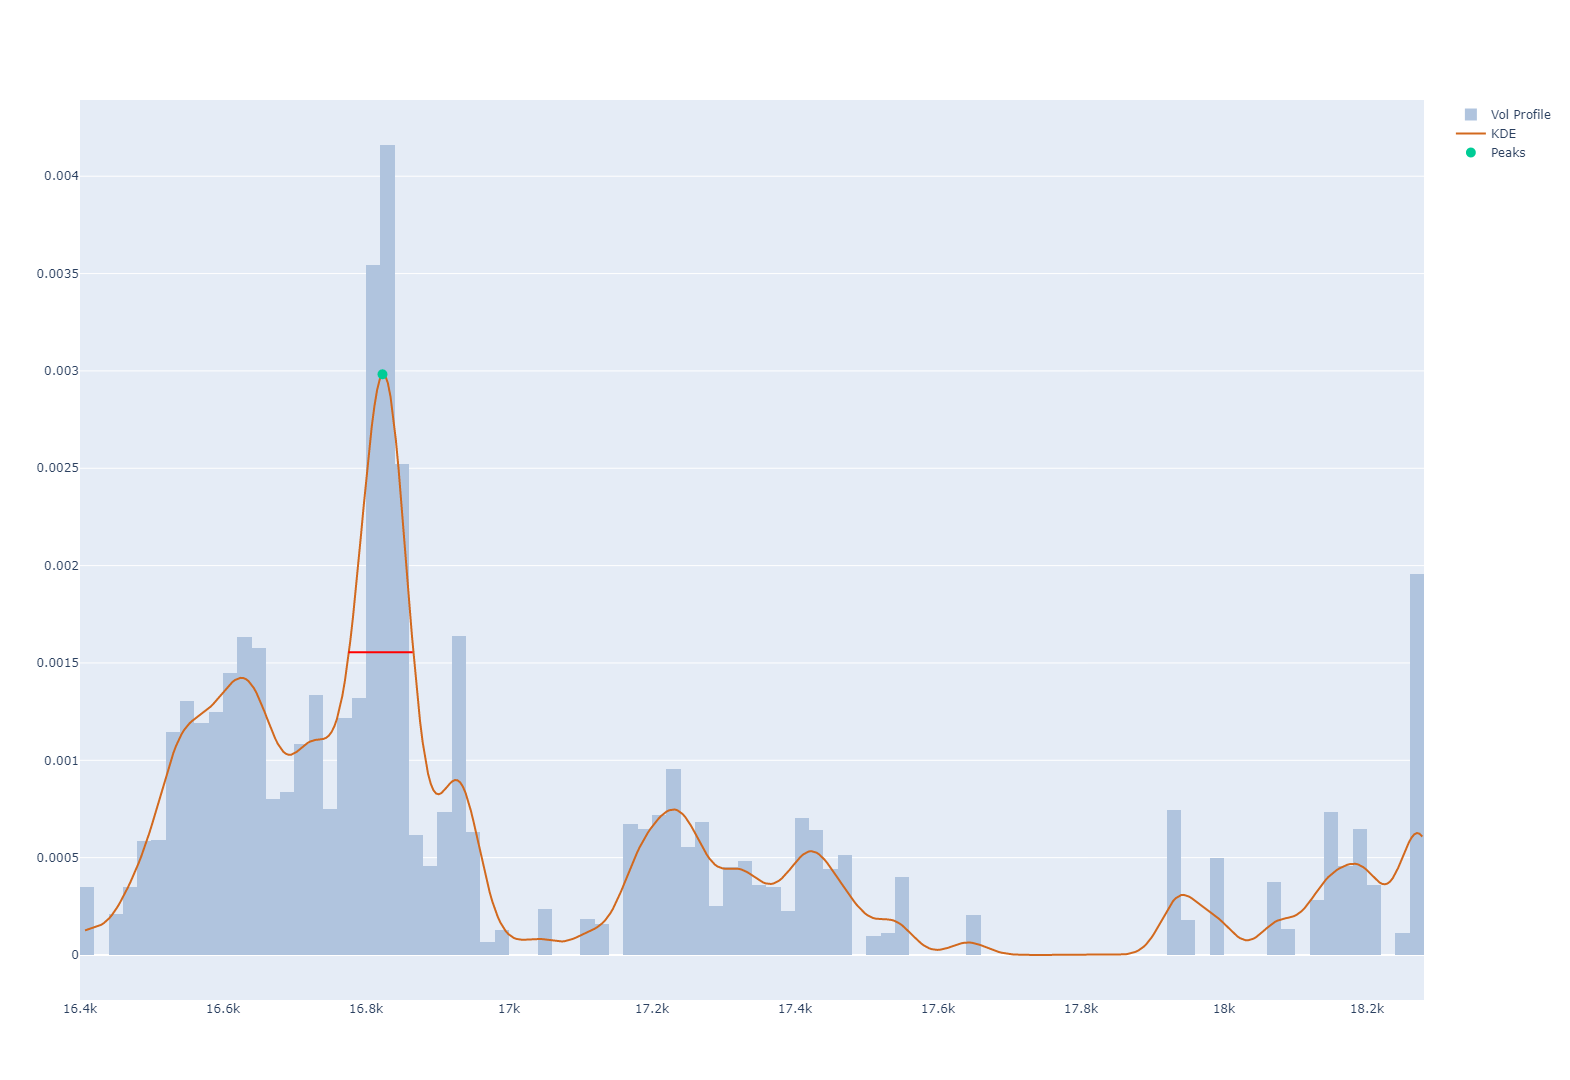

In [35]:
width_range=1
peaks, peak_props = signal.find_peaks(kdy, prominence=min_prom, width=width_range)

left_ips = peak_props['left_ips']
right_ips = peak_props['right_ips']
width_x0 = xr.min() + (left_ips * ticks_per_sample)
width_x1 = xr.min() + (right_ips * ticks_per_sample)
width_y = peak_props['width_heights']

fig = get_dist_plot(close, volume, xr, kdy)
fig.add_trace(go.Scatter(name='Peaks', x=pkx, y=pky, mode='markers', marker=pk_marker_args))

for x0, x1, y in zip(width_x0, width_x1, width_y):
    fig.add_shape(type='line',
        xref='x', yref='y',
        x0=x0, y0=y, x1=x1, y1=y,
        line=dict(
            color='red',
            width=2,
        )
    )
fig.show()

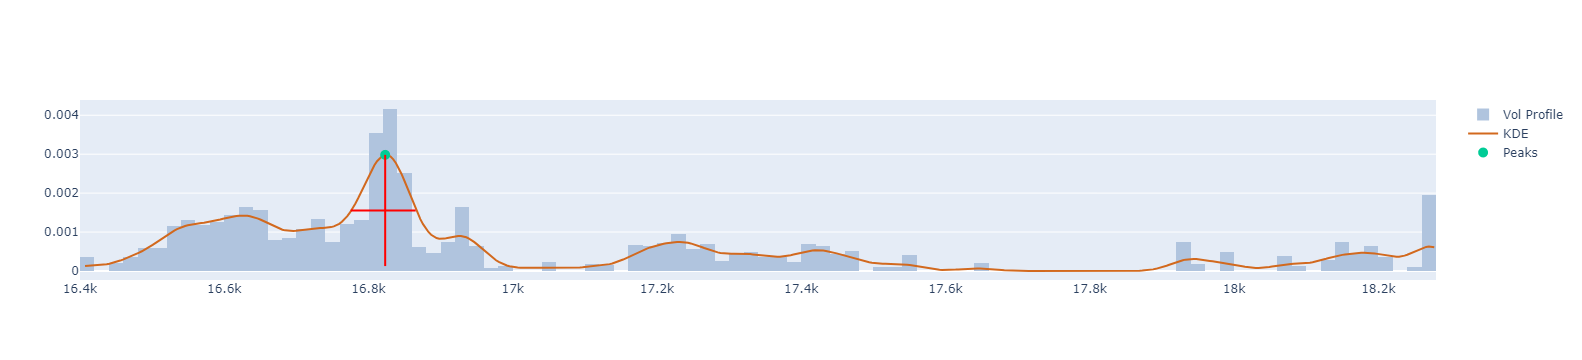

In [37]:
pipsize = 0.0001
max_width_pips = 20
min_prom = kdy.max() * 0.3
width_range=(1, max_width_pips * pipsize / ticks_per_sample)
peaks, peak_props = signal.find_peaks(kdy, width=width_range, prominence=min_prom)
pkx = xr[peaks]
pky = kdy[peaks]

for x0, x1, y in zip(width_x0, width_x1, width_y):
    fig.add_shape(type='line',
        xref='x', yref='y',
        x0=x0, y0=y, x1=x1, y1=y,
        line=dict(
            color='red',
            width=2,
        )
    )
fig.show()

In [4]:
user_id = '0xbdfa4f4492dd7b7cf211209c4791af8d52bf5c50'

In [5]:
link = f'https://pro-openapi.debank.com/v1/user/used_chain_list?id={user_id}'

In [6]:
x = requests.get(link, '98777e2ded1803b2712564ec4c5047e1e4603732')

In [8]:
x.json()

{'message': 'You are not authorized to access the URL, you can get your access key from https://cloud.debank.com.'}

In [10]:
w = requests.get('https://api.etherscan.io/api?module=account&action=balance&address=0xa8470c1a460b92bfad6a0ca0f16a886e94a94c6d&tag=latest&apikey=I2EER5I6DGY2GZ3CSPKF2F3PGUAH54QT1J')

In [11]:
w.json()

{'status': '1', 'message': 'OK', 'result': '3994946289635386'}

In [12]:
w

<Response [200]>

In [2]:
wallets_tracker2.WalletsTracker(save_activities=True, apply_time_threshold=True)

2023-02-11 05:37:27. RektFoodFarmer: 0xa0d031e3106967194be9f2f897407659b423cb7c
2023-02-11 05:37:27. https://debank.com/profile/0xa0d031e3106967194be9f2f897407659b423cb7c





2023-02-11 05:37:32. NEWO whale main wallet: 0x461e76a4fe9f27605d4097a646837c32f1ccc31c
2023-02-11 05:37:32. https://debank.com/profile/0x461e76a4fe9f27605d4097a646837c32f1ccc31c





2023-02-11 05:37:37. NEWO whale acc $100k+ (sold here $40k NEWO): 0xbb030a0408edc41f3c61ba3f132c06e93eda68f4
2023-02-11 05:37:37. https://debank.com/profile/0xbb030a0408edc41f3c61ba3f132c06e93eda68f4





2023-02-11 05:37:41. NEWO whale 1st acc: 0x57efbe536d87b738e42740920b99fd820ac41777
2023-02-11 05:37:41. https://debank.com/profile/0x57efbe536d87b738e42740920b99fd820ac41777





2023-02-11 05:37:46. NEWO whale 2nd acc: 0x5b3ab92e283eadf2cf71a529f2764bba5bff462b
2023-02-11 05:37:46. https://debank.com/profile/0x5b3ab92e283eadf2cf71a529f2764bba5bff462b





2023-02-11 05:37:50. NEWO whale 3th acc: 0x9a7751ed3560d9a0ed0a33d6993a95d8

,action,chain,sends,sends_value,receives,receives_value,counterparty,event_time
0,Swap (check why he uses is),Optimism,6648.080467 OP,"15,981.98500",10.531 WETH,"15,997.95800",no_counterparty,2023-02-11 05:34:23







{'eth_gas_fee': 0.05305051409848286, 'from_addr': '0x53237a2b2203c57dc0e9a3b71190cd1a71a553de', 'name': 'withdrawETH', 'params': [], 'status': 1, 'to_addr': '0x1e4b7a6b903680eab0c5dabcb8fd429cd2a9598c', 'usd_gas_fee': 0.06524152223831423, 'value': 0.0}
2023-02-11 05:38:51. METIS accumulation $250k usd net worth: 0x53237a2b2203c57dc0e9a3b71190cd1a71a553de
2023-02-11 05:38:51. https://debank.com/profile/0x53237a2b2203c57dc0e9a3b71190cd1a71a553de





2023-02-11 05:38:56. $500k wallet: 0x0d66c4eee0c792b9bd38e97676493ed12a55e656
2023-02-11 05:38:56. https://debank.com/profile/0x0d66c4eee0c792b9bd38e97676493ed12a55e656





2023-02-11 05:39:00. GMX Whale $2m - if he sold price dumps: 0x4780e046a55decc374499ba67e679287d9ba0a40
2023-02-11 05:39:00. https://debank.com/profile/0x4780e046a55decc374499ba67e679287d9ba0a40





2023-02-11 05:39:04. GMX Whale $2m second acc  - if he sold price dumps: 0xba154324a2b89d894cde38b492a455fef98c908c
2023-02-11 05:39:04. https://debank.com/profile/0xba

In [2]:
%%writefile C:/Users/kocin/.jupyter/lab/user-settings/@jupyterlab/notebook-extension/tracker.jupyterlab-settings
{
    "maxNumberOutputs":150
}

Writing C:/Users/kocin/.jupyter/lab/user-settings/@jupyterlab/notebook-extension/tracker.jupyterlab-settings


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/kocin/.jupyter/lab/user-settings/@jupyterlab/notebook-extension/tracker.jupyterlab-settings'

In [22]:
i = dp.download_coingecko_market_info_for_api_id('the-ennead')

In [23]:
i

{'id': 'the-ennead',
 'symbol': 'neadram',
 'name': 'The Ennead',
 'asset_platform_id': 'arbitrum-one',
 'platforms': {'arbitrum-one': '0x40301951af3f80b8c1744ca77e55111dd3c1dba1'},
 'detail_platforms': {'arbitrum-one': {'decimal_place': 18,
   'contract_address': '0x40301951af3f80b8c1744ca77e55111dd3c1dba1'}},
 'block_time_in_minutes': 0,
 'hashing_algorithm': None,
 'categories': [],
 'public_notice': None,
 'additional_notices': ['No active trades are found for this coin. Please submit a ticket at %{link} if you think this is an error.'],
 'description': {'en': 'The Ennead is an optimization layer built upon ve(3,3) protocols. We aim to pool our collective resources to bolster the ecosystems, and to provide a seamless integration for all users.\r\n\r\nThe Ennead is able to provide true Real-Yield without relying on an emissions model artificially pumping the returns. This is done through optimizing existing infrastructure, such as the veRAM fee/bribing model, along with providing bo